### Group 3: Predicting CTA Usage Using Ridership, Demographic, and Socioeconomic Data

Lucy Chavez, lchave28@depaul.edu  
Denvir Gama, dlnu1@depaul.edu  
Zach Hollis, zhollis@depaul.edu   
Danielle Martin, dmart164@depaul.edu  

#### CTA Stations and Hardship Index Scores

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

#### Hardship Index Scores by Chicago Community Area, 2016-2020

In [2]:
# Read in the data
hardship = pd.read_csv('Hardship Index Scores.csv', encoding='cp1252')

Hardship Index Scores contains information on the conditions of economic and social hardship within Chicago community areas from 2016 to 2020.

In [3]:
# Convert the data to a dataframe
df = pd.DataFrame(hardship)
df

,Community Area,Community Area Number,Hardship Index Score,Percent of Crowded Housing,Percent of Households With Income Below Poverty Level,Unemployment Rate for Population Age 16 and Over,Percent Aged 25 and over with no High School Diploma,Percent of Population Under Age 18 and Over Age 64,Per Capita Income
0,Rogers Park,1,40.9,6.4,19.8,4.6,11.7,26.7,29682
1,West Ridge,2,52.1,8.1,14.6,6.3,17.4,39.4,27671
2,Uptown,3,32.4,4.4,19.0,3.3,9.8,24.4,42112
3,Lincoln Square,4,24.7,2.3,8.2,5.4,6.4,26.3,49797
4,North Center,5,18.1,0.9,5.5,3.2,3.4,34.3,77951
...,...,...,...,...,...,...,...,...,...
72,Washington Heights,73,45.9,0.8,20.0,14.2,11.4,40.0,24294
73,Mount Greenwood,74,30.1,2.1,5.8,4.4,4.7,38.3,41850
74,Morgan Park,75,37.0,1.0,11.6,10.6,6.3,40.3,34946
75,O'Hare,76,32.7,3.1,10.4,3.8,8.3,32.8,35715


In [4]:
# Summarize the data
df.describe()

,Community Area Number,Hardship Index Score,Percent of Crowded Housing,Percent of Households With Income Below Poverty Level,Unemployment Rate for Population Age 16 and Over,Percent Aged 25 and over with no High School Diploma,Percent of Population Under Age 18 and Over Age 64,Per Capita Income
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,39.000000,44.664935,3.448052,18.702597,10.544156,15.236364,35.544156,34306.779221
std,22.371857,16.474923,2.330892,10.670249,6.698674,9.161589,6.729540,19966.654661
min,1.000000,9.400000,0.100000,5.100000,0.700000,1.800000,15.900000,13982.000000
25%,20.000000,32.700000,1.700000,10.200000,5.100000,8.100000,32.800000,21385.000000
50%,39.000000,46.100000,2.800000,15.200000,8.500000,13.600000,37.700000,27871.000000
75%,58.000000,57.000000,4.400000,26.500000,15.900000,20.800000,40.200000,38888.000000
max,77.000000,76.500000,11.000000,51.900000,29.900000,41.100000,47.200000,104139.000000


There are 77 community areas within Chicago. The hardship index scores range from 9.4 to 76.5 with a mean of 44.66.

In [5]:
# Check to make sure there are no missing values
df.isnull().sum()

Community Area                                           0
Community Area Number                                    0
Hardship Index Score                                     0
Percent of Crowded Housing                               0
Percent of Households With Income Below Poverty Level    0
Unemployment Rate for Population Age 16 and Over         0
Percent Aged 25 and over with no High School Diploma     0
Percent of Population Under Age 18 and Over Age 64       0
Per Capita Income                                        0
dtype: int64

<Axes: ylabel='Frequency'>

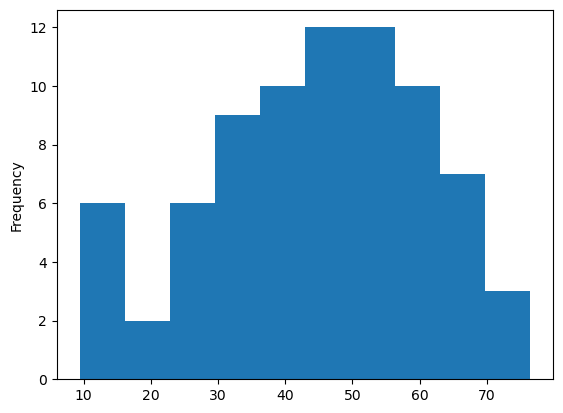

In [6]:
# Plot a histogram
df["Hardship Index Score"].plot(kind="hist", bins=10)

<Axes: ylabel='Frequency'>

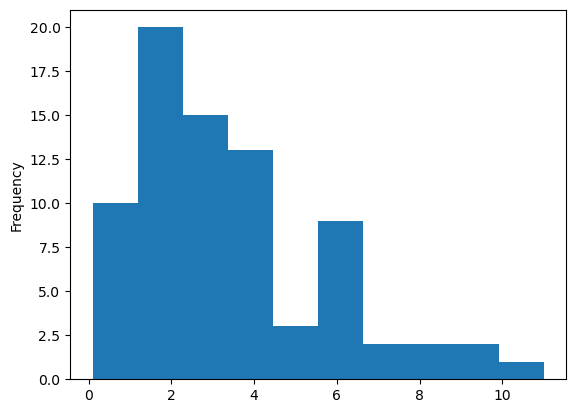

In [7]:
# Plot a histogram
df["Percent of Crowded Housing"].plot(kind="hist", bins=10)

<Axes: ylabel='Frequency'>

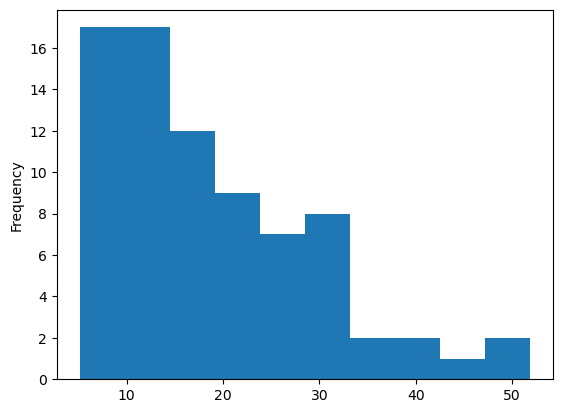

In [8]:
# Plot a histogram
df["Percent of Households With Income Below Poverty Level"].plot(kind="hist", bins=10)

<Axes: ylabel='Frequency'>

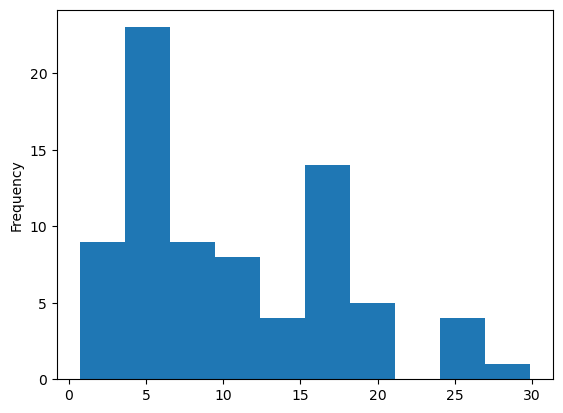

In [9]:
# Plot a histogram
df["Unemployment Rate for Population Age 16 and Over"].plot(kind="hist", bins=10)

<Axes: ylabel='Frequency'>

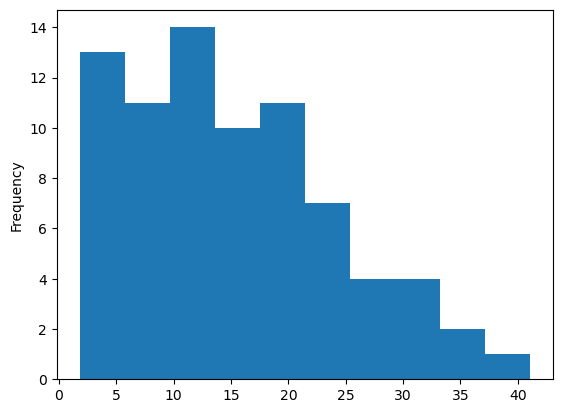

In [10]:
# Plot a histogram
df["Percent Aged 25 and over with no High School Diploma"].plot(kind="hist", bins=10)

<Axes: ylabel='Frequency'>

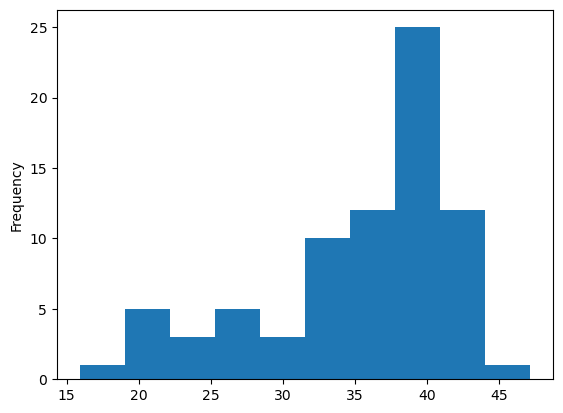

In [11]:
# Plot a histogram
df["Percent of Population Under Age 18 and Over Age 64"].plot(kind="hist", bins=10)

<Axes: ylabel='Frequency'>

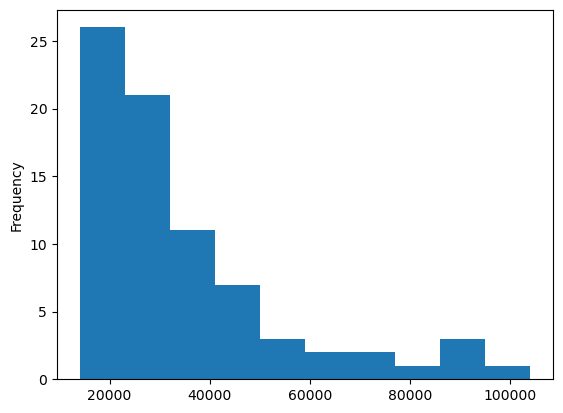

In [12]:
# Plot a histogram
df["Per Capita Income"].plot(kind="hist", bins=10)

- "Hardship Index Score" is pretty uniformly distributed with a slight skew to the left.
- "Percent of Population Under Age 18 and Over Age 64" is skewed to the left.
- "Percent of Crowded Housing", "Percent of Households With Income Below Poverty Level", "Unemployment Rate for Population Age 16 and Over", "Percent Aged 25 and over with no High School Diploma", and "Per Capita Income" are skewed to the right. 

In [13]:
# Sort the dataframe by 'Hardship Index Score'
sorted_df = df.sort_values(['Hardship Index Score'], ascending=[False])
sorted_df

,Community Area,Community Area Number,Hardship Index Score,Percent of Crowded Housing,Percent of Households With Income Below Poverty Level,Unemployment Rate for Population Age 16 and Over,Percent Aged 25 and over with no High School Diploma,Percent of Population Under Age 18 and Over Age 64,Per Capita Income
53,Riverdale,54,76.5,6.2,48.0,29.9,13.9,41.4,14175
36,Fuller Park,37,75.1,1.3,51.9,25.1,23.8,47.2,13982
25,West Garfield Park,26,71.6,6.1,34.8,24.1,25.3,38.4,14760
67,Englewood,68,68.2,1.4,39.7,24.9,23.7,42.7,15034
60,New City,61,67.0,5.5,28.7,16.8,30.6,40.2,18040
...,...,...,...,...,...,...,...,...,...
5,Lakeview,6,13.5,1.8,8.9,3.5,1.8,20.6,74366
31,Loop,32,12.9,4.0,6.7,5.8,4.0,15.9,90513
6,Lincoln Park,7,11.4,0.9,10.1,3.1,2.0,24.0,90189
32,Near South Side,33,10.2,1.3,8.1,0.7,4.8,22.0,88784


Five community areas with the highest hardship index scores: Riverdale (76.5), Fuller Park (75.1), West Garfield Park (71.6), Englewood (68.2), and New City (67.0)

Five community areas with the lowest hardship index scores: Near North Side (9.4), Near South Side (10.2), Lincoln Park (11.4), Loop (12.9), and Lakeview (13.5)

In [14]:
# Remove "Community Area" and "Community Area Number" from the dataframe
df_updated = df[['Hardship Index Score','Percent of Crowded Housing', 'Percent of Households With Income Below Poverty Level', 
       'Unemployment Rate for Population Age 16 and Over', 
       'Percent Aged 25 and over with no High School Diploma', 
       'Percent of Population Under Age 18 and Over Age 64', 'Per Capita Income']]

<Axes: >

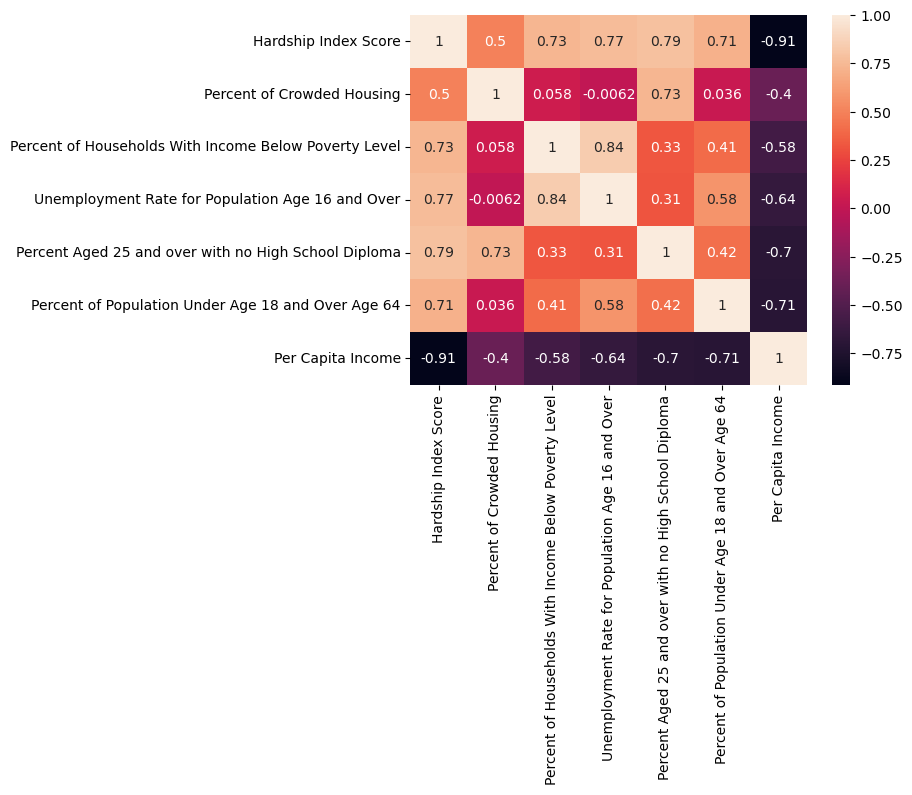

In [15]:
# Create a heatmap to show the correlations between variables
sns.heatmap(df_updated.corr(), annot = True)

It makes sense that Hardship Index Score is highly correlated with the other variables because the score is created using those variables. Per Capita Income is almost perfectly correlated with Hardship Index Score. The higher a person's income, the lower their hardship index score will be. Percent of Households With Income Below Poverty Level and Unemployment Rate for Population Age 16 and Over have the next strongest correlation. Again, this makes sense. If a person is unemployed and doesn't have an income, their household is more likely to have an income below the poverty level. The least correlated variables are Unemployment Rate for Population Age 16 and Over and Percent of Crowded Housing. 

In [16]:
# Set the independent variable
x = df[['Percent of Crowded Housing', 'Percent of Households With Income Below Poverty Level', 
       'Unemployment Rate for Population Age 16 and Over', 
       'Percent Aged 25 and over with no High School Diploma', 
       'Percent of Population Under Age 18 and Over Age 64', 'Per Capita Income']]

In [17]:
# Set the dependent (target) variable
y = df['Hardship Index Score']

In [18]:
# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

#### Linear Regression

In [19]:
# Create a linear regression model 
lr = LinearRegression()
lr.fit(x_train, y_train)

prediction = lr.predict(x_test)
actual = y_test

# Determine the R^2 metric
train_score_lr = lr.score(x_train, y_train)
test_score_lr = lr.score(x_test, y_test)
print('Training R^2: ' + str(train_score_lr))
print('Test R^2: ' + str(test_score_lr))

Training R^2: 0.9999922510076841
Test R^2: 0.9999795610060773


#### Ridge Regression

In [20]:
# Create a ridge regression model with 5-fold cross-validation
n_folds = 5
rr = linear_model.RidgeCV(alphas=np.power(10.,np.arange(0,5,0.1)), cv = n_folds)
rr.fit(x_train, y_train)

prediction = rr.predict(x_test)
actual = y_test

# Determine the R^2 metric
train_score_rr = rr.score(x_train, y_train)
test_score_rr = rr.score(x_test, y_test)
print('Training R^2: ' + str(train_score_rr))
print('Test R^2: ' + str(test_score_rr))

Training R^2: 0.9999908406877841
Test R^2: 0.999980253501339


Because Hardship Index Score is created using the other six variables, these models overfit the data.

#### CTA Stations and Hardship Index Scores

Is there a relationship between the number of stations in a community area (access to public transportation) and the hardship index score?

In [21]:
# Read in the data
data = pd.read_csv('CTA_HIS.csv')

CTA_HIS includes all of the CTA data plus the community area name, community area number, and hardship index score data associated with each station.

In [22]:
# Convert the data to a dataframe
df = pd.DataFrame(data)
df

,GEOID,Total.Workers.in.Management..business..science..and.arts.occupations,Total.Workers.in.Service.occupations,Workers.in.Sales.and.office.occupations,Workers.in.Natural.resources..construction..and.maintenance.occupations,Workers.in.Production..transportation..and.material.moving.occupations,Workers.in.Military.specific.occupations,Agriculture..forestry..fishing.and.hunting..and.mining,Construction,Manufacturing,...,Community Area,Other Community Area,Community Area Number,Hardship Index Score,Percent of Crowded Housing,Percent of Households With Income Below Poverty Level,Unemployment Rate for Population Age 16 and Over,Percent Aged 25 and over with no High School Diploma,Percent of Population Under Age 18 and Over Age 64,Per Capita Income
0,17031140701,29.4,37.1,11.4,5.9,16.3,0.0,0.0,4.8,10.1,...,Albany Park,,14,44.8,6.4,12.6,6.6,19.3,31.7,32298
1,17031140701,29.4,37.1,11.4,5.9,16.3,0.0,0.0,4.8,10.1,...,Albany Park,,14,44.8,6.4,12.6,6.6,19.3,31.7,32298
2,17031140800,52.3,10.6,23.2,6.7,7.3,0.0,0.8,9.1,6.8,...,Albany Park,,14,44.8,6.4,12.6,6.6,19.3,31.7,32298
3,17031620200,21.4,14.2,14.3,20.9,29.1,0.0,0.0,13.6,14.4,...,Archer Heights,,57,62.9,11.0,10.2,8.5,29.3,40.3,21399
4,17031340500,48.1,16.2,20.3,7.0,8.4,0.0,0.0,5.5,11.3,...,Armour Square,,34,62.9,5.7,28.3,7.1,33.6,42.7,24823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,17031242000,74.5,3.7,18.5,0.4,3.0,0.0,0.0,2.6,5.6,...,West Town,,24,14.8,1.3,8.8,3.2,5.8,19.4,68188
125,17031243500,78.3,5.6,13.8,0.0,2.3,0.0,0.0,1.8,5.9,...,West Town,,24,14.8,1.3,8.8,3.2,5.8,19.4,68188
126,17031842300,69.8,5.4,17.5,3.7,3.2,0.5,0.0,1.0,3.3,...,West Town,,24,14.8,1.3,8.8,3.2,5.8,19.4,68188
127,17031420700,30.1,21.0,23.8,0.0,25.2,0.0,0.0,0.0,6.2,...,Woodlawn,,42,53.1,4.0,31.1,15.9,12.7,33.8,22457


In [23]:
# Look at the dimensions of the dataframe
df.shape

(129, 116)

In [25]:
# Find the number of community areas with station(s)
df['Community Area'].nunique()

43

I updated the dataset (CTA_HIS) so that stations that were considered part of two different community areas (Kedzie-Midway, Western-Orange, 51st, Montrose-O'Hare, Addison-O'Hare, and Roosevelt) were included twice (once for each community area). This means that there are now 129 stations instead of 123 and that 43 community areas have stations instead of 41. I thought it was more important to have the data accurately reflect the number of community areas with stations than the exact total number of stations. 

In [26]:
# Find the value counts (number of stations) per community area
df['Community Area'].value_counts()

Loop                      17
Near West Side             8
Near North Side            7
Lakeview                   6
Austin                     5
Rogers Park                4
North Lawndale             4
Lower West Side            4
East Garfield Park         4
Edgewater                  4
West Town                  4
Logan Square               4
Lincoln Square             4
Grand Boulevard            4
Uptown                     3
Irving Park                3
Lincoln Park               3
Albany Park                3
Greater Grand Crossing     2
Near South Side            2
Armour Square              2
West Garfield Park         2
Avondale                   2
O'Hare                     2
Brighton Park              2
North Center               2
Gage Park                  2
Englewood                  2
Fuller Park                2
Washington Park            2
Woodlawn                   2
Douglas                    1
McKinley Park              1
Chatham                    1
Portage Park  

In [27]:
# Filter by community area and hardship index score
df_scores = df[['Community Area', 'Hardship Index Score']]
df_scores

,Community Area,Hardship Index Score
0,Albany Park,44.8
1,Albany Park,44.8
2,Albany Park,44.8
3,Archer Heights,62.9
4,Armour Square,62.9
...,...,...
124,West Town,14.8
125,West Town,14.8
126,West Town,14.8
127,Woodlawn,53.1


In [28]:
# Remove duplicates from above
df_scores = df_scores.sort_values('Community Area', ascending=True)
df_scores_unique = df_scores.drop_duplicates()

# Look at the scores in order from highest to lowest
df_scores_unique_sorted = df_scores_unique.sort_values('Hardship Index Score', ascending=False)
df_scores_unique_sorted

,Community Area,Hardship Index Score
30,Fuller Park,75.1
121,West Garfield Park,71.6
28,Englewood,68.2
115,South Lawndale,66.7
16,Gage Park,66.4
19,East Garfield Park,65.8
15,Brighton Park,65.5
120,West Englewood,64.1
4,Armour Square,62.9
3,Archer Heights,62.9


In [29]:
# Read in the data
data2 = pd.read_csv('CTA_HIS_simple.csv')

CTA_HIS_simple is a simplified dataset with just the community area name, the number of stations per community area, and the hardship index score associated with that area. 

In [30]:
# Convert the data to a dataframe
df2 = pd.DataFrame(data2)
df2

,Community Area,Number of Stations,Hardship Index Score
0,Albany Park,3,44.8
1,Archer Heights,1,62.9
2,Armour Square,2,62.9
3,Ashburn,0,47.4
4,Auburn Gresham,0,53.2
...,...,...,...
72,West Lawn,0,59.2
73,West Pullman,0,53.5
74,West Ridge,0,52.1
75,West Town,4,14.8


I also updated CTA_HIS_simple to reflect the updated station counts. 

In [31]:
# Summarize the data
df2.describe()

,Number of Stations,Hardship Index Score
count,77.000000,77.000000
mean,1.675325,44.664935
std,2.541454,16.474923
min,0.000000,9.400000
25%,0.000000,32.700000
50%,1.000000,46.100000
75%,2.000000,57.000000
max,17.000000,76.500000


In [32]:
# Read in the data
data3 = pd.read_csv('CTA_HIS_updated.csv')

CTA_HIS_updated is another simplied dataset. I took the original CTA_HIS dataset, added a column with the number of stations, and kept certain columns relating to race, education, income, and population, plus the data on the stations and the associated hardship index score data. 

The goal is to expand on the hardship index data and get a better understanding of how these variables (race, education, income, and population) relate to the community areas and the availability of public transportation.

In [33]:
# Convert the data to a dataframe
df3 = pd.DataFrame(data3)
df3

,STATION_DESCRIPTIVE_NAME,stationname,Community Area,Other Community Area,Number of Stations,Community Area Number,Hardship Index Score,Percent of Crowded Housing,Percent of Households With Income Below Poverty Level,Unemployment Rate for Population Age 16 and Over,...,EDUCATION.Bachelor.s.degree,EDUCATION.Graduate.or.professional.degree,Median.income..dollars.,Total.population,Median.age..years.,Sex.ratio..males.per.100.females.,Male.Total.population,Male.Median.age..years.,Female.Total.population,Female.Median.age..years.
0,Kedzie (Brown Line),Kedzie-Brown,Albany Park,,3,14,44.8,6.4,12.6,6.6,...,21.5,12.5,35319,2990,36.6,113.7,1591,35.5,1399,37.7
1,Kimball (Brown Line),Kimball,Albany Park,,3,14,44.8,6.4,12.6,6.6,...,21.5,12.5,35319,2990,36.6,113.7,1591,35.5,1399,37.7
2,Francisco (Brown Line),Francisco,Albany Park,,3,14,44.8,6.4,12.6,6.6,...,37.7,25.3,43594,6212,33.9,106.4,3202,30.6,3010,36.0
3,Pulaski (Orange Line),Pulaski-Orange,Archer Heights,,1,57,62.9,11.0,10.2,8.5,...,14.4,4.0,33634,1948,37.8,87.7,910,44.7,1038,34.8
4,Sox-35th (Red Line),Sox-35th-Dan Ryan,Armour Square,,2,34,62.9,5.7,28.3,7.1,...,21.4,16.7,40389,1558,55.3,83.7,710,45.9,848,65.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,Division (Blue Line),Division/Milwaukee,West Town,,4,24,14.8,1.3,8.8,3.2,...,44.0,29.4,71791,4378,33.3,72.6,1841,33.8,2537,31.8
125,Chicago (Blue Line),Chicago/Milwaukee,West Town,,4,24,14.8,1.3,8.8,3.2,...,53.6,28.1,94152,4567,32.3,103.2,2320,33.4,2247,30.6
126,Grand (Blue Line),Grand/Milwaukee,West Town,,4,24,14.8,1.3,8.8,3.2,...,50.5,26.8,81909,3672,34.0,131.2,2084,34.4,1588,33.4
127,King Drive (Green Line),King Drive,Woodlawn,,2,42,53.1,4.0,31.1,15.9,...,6.6,7.4,20248,2274,34.6,78.6,1001,38.8,1273,32.9


In [34]:
# Set the independent variable
x = df3.drop(columns=['STATION_DESCRIPTIVE_NAME', 'stationname', 'Community Area', 'Other Community Area', 'Number of Stations', 'Community Area Number'])
x

,Hardship Index Score,Percent of Crowded Housing,Percent of Households With Income Below Poverty Level,Unemployment Rate for Population Age 16 and Over,Percent Aged 25 and over with no High School Diploma,Percent of Population Under Age 18 and Over Age 64,Per Capita Income,RACE.White,RACE.Black.or.African.American,RACE.American.Indian.and.Alaska.Native,...,EDUCATION.Bachelor.s.degree,EDUCATION.Graduate.or.professional.degree,Median.income..dollars.,Total.population,Median.age..years.,Sex.ratio..males.per.100.females.,Male.Total.population,Male.Median.age..years.,Female.Total.population,Female.Median.age..years.
0,44.8,6.4,12.6,6.6,19.3,31.7,32298,33.1,4.0,2.1,...,21.5,12.5,35319,2990,36.6,113.7,1591,35.5,1399,37.7
1,44.8,6.4,12.6,6.6,19.3,31.7,32298,33.1,4.0,2.1,...,21.5,12.5,35319,2990,36.6,113.7,1591,35.5,1399,37.7
2,44.8,6.4,12.6,6.6,19.3,31.7,32298,68.0,0.1,0.0,...,37.7,25.3,43594,6212,33.9,106.4,3202,30.6,3010,36.0
3,62.9,11.0,10.2,8.5,29.3,40.3,21399,57.9,0.0,0.0,...,14.4,4.0,33634,1948,37.8,87.7,910,44.7,1038,34.8
4,62.9,5.7,28.3,7.1,33.6,42.7,24823,51.0,6.0,0.0,...,21.4,16.7,40389,1558,55.3,83.7,710,45.9,848,65.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,14.8,1.3,8.8,3.2,5.8,19.4,68188,54.7,23.0,0.0,...,44.0,29.4,71791,4378,33.3,72.6,1841,33.8,2537,31.8
125,14.8,1.3,8.8,3.2,5.8,19.4,68188,65.4,14.0,0.0,...,53.6,28.1,94152,4567,32.3,103.2,2320,33.4,2247,30.6
126,14.8,1.3,8.8,3.2,5.8,19.4,68188,68.6,14.3,0.0,...,50.5,26.8,81909,3672,34.0,131.2,2084,34.4,1588,33.4
127,53.1,4.0,31.1,15.9,12.7,33.8,22457,0.1,93.5,0.9,...,6.6,7.4,20248,2274,34.6,78.6,1001,38.8,1273,32.9


In [35]:
# Set the dependent variable
y = df3['Number of Stations']
y

0      3
1      3
2      3
3      1
4      2
      ..
124    4
125    4
126    4
127    2
128    2
Name: Number of Stations, Length: 129, dtype: int64

In [36]:
# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

#### Linear Regression

In [37]:
# Create linear regression model 
lr = LinearRegression()
lr.fit(x_train, y_train)

prediction = lr.predict(x_test)
actual = y_test

# Determine the R^2 metric
train_score_lr = lr.score(x_train, y_train)
test_score_lr = lr.score(x_test, y_test)
print('Training R^2: ' + str(train_score_lr))
print('Test R^2: ' + str(test_score_lr))

Training R^2: 0.8931588400248923
Test R^2: 0.687701625300905


#### Ridge Regression

In [38]:
# Create ridge regression model 
n_folds = 5
rr = linear_model.RidgeCV(alphas=np.power(10.,np.arange(0,5,0.1)), cv = n_folds)
rr.fit(x_train, y_train)

prediction = rr.predict(x_test)
actual = y_test

# Determine the R^2 metric
train_score_rr = rr.score(x_train, y_train)
test_score_rr = rr.score(x_test, y_test)
print('Training R^2: ' + str(train_score_rr))
print('Test R^2: ' + str(test_score_rr))

Training R^2: 0.8919455303621927
Test R^2: 0.7079155852700332


#### Conclusions

The models performed much better on the training data than the test data. In order to better accurately predict the number of stations in a community area, I could try different models that have more hyperparameter tuning involved. I could also try using more or different variables from the original CTA dataset. I think these R^2 values (0.69 and 0.71) show that there is potential here. I also acknowledge that there are many other factors that could affect the number of stations in an area, such as access to other public transportation options.